In [2]:
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
R=4660#meas
C=4.772e-6# nom 4.7uF
To=R*C
To

0.02223752

In [28]:
import serial
import time
import matplotlib.pyplot as plt 
import numpy as np
def Get_Data(port = 'COM5', bps= 115200):
    # Replace 'COM3' with your Arduino port (on Linux it may be '/dev/ttyUSB0')
    ser = serial.Serial(port, bps, timeout=1)  # baud rate must match Arduino
    time.sleep(2)  # wait for Arduino reset
    arr=[]
    
    
    # Send '#' to Arduino
    ser.write(b"#")  # sends the byte '#' to Arduino
    
    
    try:
        while True:
            line = ser.readline().decode('utf-8').strip()  # read a line
            if line:
                #print(line)
                arr.append(line)
            if "END" in line:
                break
    except KeyboardInterrupt:
        ser.close()
    
    
    ser.close()
    return ser, arr 

In [17]:
import pandas as pd 
def arr_to_df(arr, cols = None):
    arr2= []
    for x in arr: 
        if x=="END": 
            continue 
        try: 
            arr2.append(np.array(x.split('\t')).astype("int"))
        except: 
            pass
    if cols is None: 
        df = pd.DataFrame(arr2)
    else : 
        df = pd.DataFrame(arr2, columns = cols)
    return df
        

<Axes: xlabel='t'>

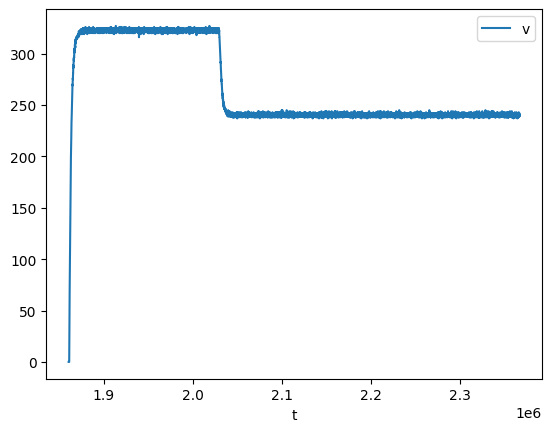

In [29]:
ser, arr =Get_Data( 'COM5')
ser.close()
df = arr_to_df(arr, cols =["t", "v"])
df.plot(x="t", y="v")

In [30]:
len(df), len(arr)

(10000, 10072)

<Axes: >

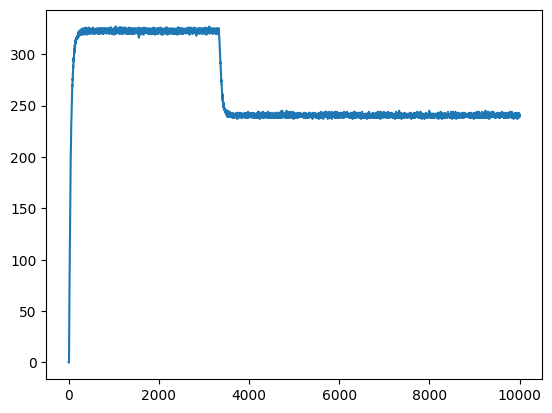

In [31]:
df.v.plot()

In [32]:
df.t.diff()

0         NaN
1       285.0
2        50.0
3        50.0
4        51.0
        ...  
9995     50.0
9996     51.0
9997     51.0
9998     50.0
9999     51.0
Name: t, Length: 10000, dtype: float64

In [33]:
df.head()

,t,v
0,1860635,0.0
1,1860920,0.0
2,1860970,0.0
3,1861020,0.0
4,1861071,0.0


In [34]:
df.to_csv("df_V1.csv")